In [300]:
library(ggplot2)
options(repr.plot.height=8,repr.plot.width=16)

Cargar los datos en un dataframe llamado: airbnb

In [301]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [302]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [303]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

In [304]:
names(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [305]:
pieToMetro = 0.092903
airbnb['MetrosCuadrados'] = airbnb['PiesCuadrados']*pieToMetro

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [312]:
codigos = airbnb['CodigoPostal']

In [313]:
codigos[codigos == 'Madrid 28004'] <- 28004
codigos[codigos == '2815'] <- 28015
codigos[codigos == '28051\n28051'] <- 28051
codigos[codigos == '2805'] <- 28005
codigos[codigos == '2804'] <- 28004
codigos[codigos == '280013'] <- 28013
codigos[codigos == '28002\n28002'] <- 28002


In [314]:
codigos[codigos == ''] <- NA
codigos[codigos == '-'] <- NA
codigos[codigos == '28'] <- NA
codigos[codigos == '20013'] <- NA
codigos[codigos == '20126'] <- NA
codigos[codigos == '2015'] <- NA
codigos[codigos == '25008'] <- NA
codigos[codigos == '27004'] <- NA
codigos[codigos == '27013'] <- NA

In [316]:
airbnb['CodigoPostal'] <- codigos

**He intentado hacer esta parte con regex, pero como iba mal de tiempo 
lo he hecho escribiendo todos los casos a mano para poder avanzar ya 
que llevaba bastante rato atascada en eso.**

In [13]:
airbnb$CodigoPostal <- droplevels(airbnb$CodigoPostal)
#table(airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [14]:
levels(airbnb$CodigoPostal)
nlevels(airbnb$CodigoPostal)

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

[1] 61

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [15]:
summary(airbnb$CodigoPostal)

28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1796  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850  NA's 
   85    12    12     1     1     1     1     1     1   447

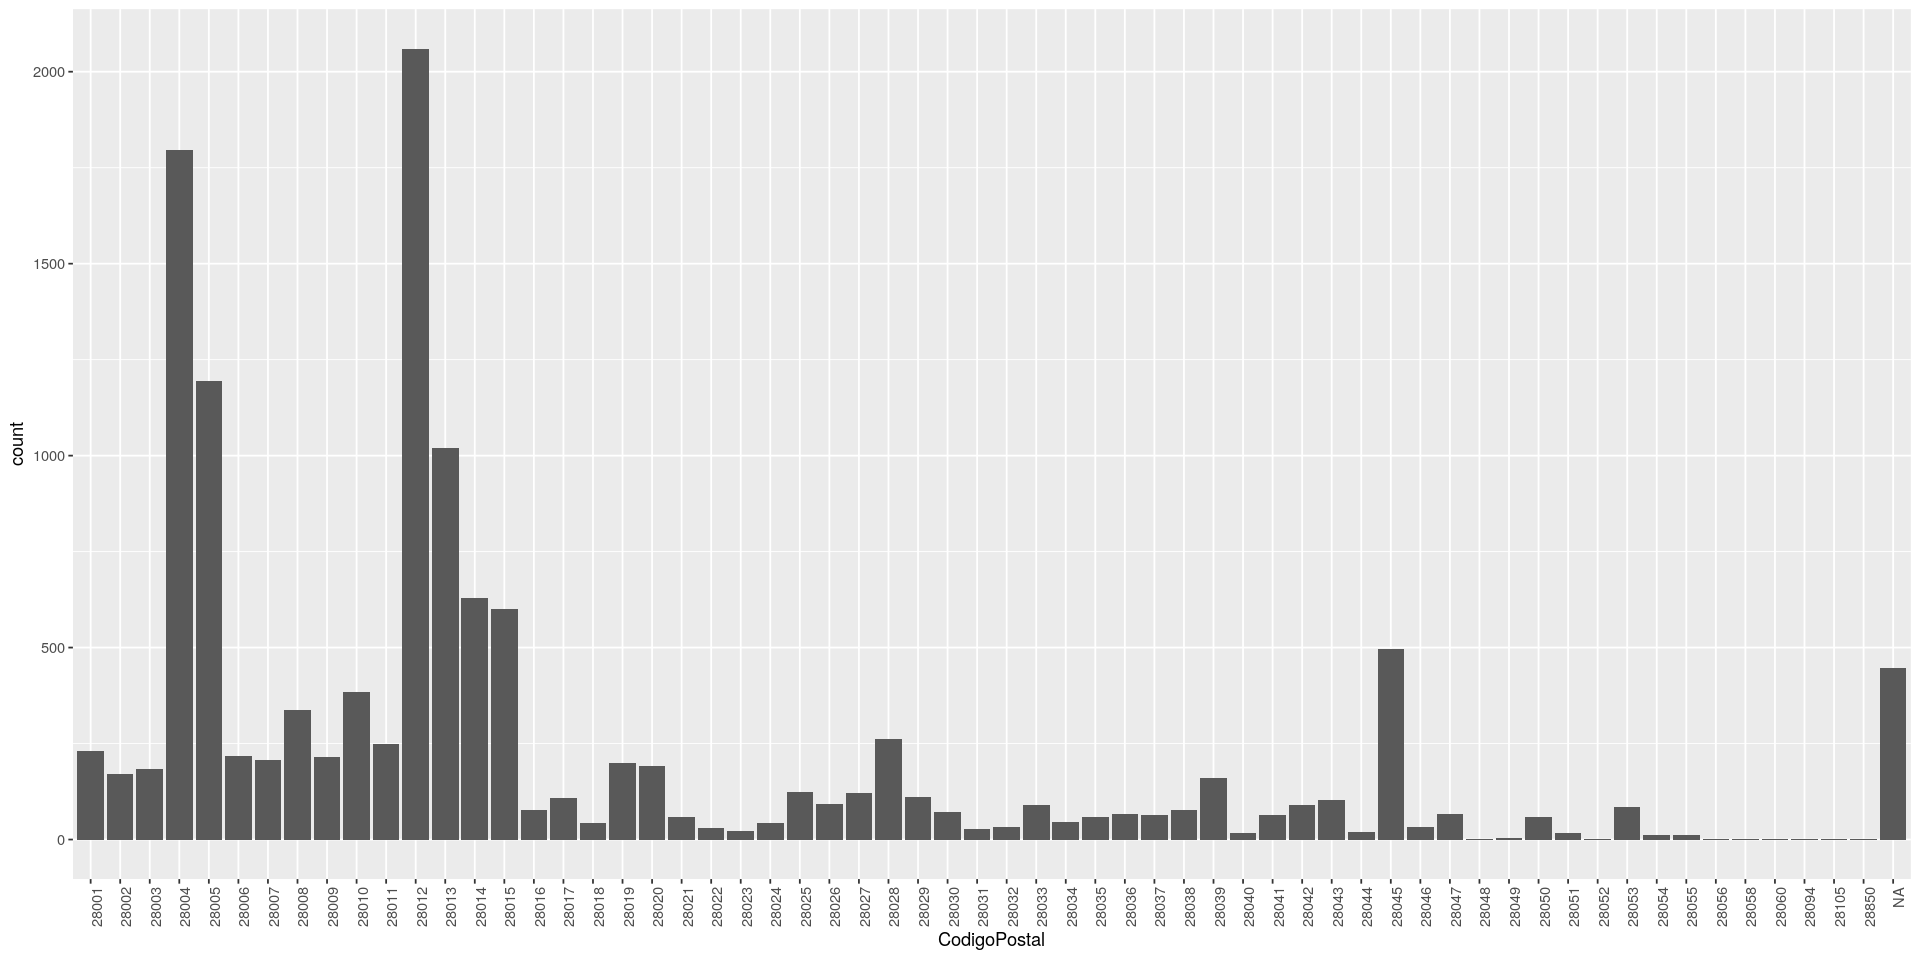

In [16]:
ggplot(airbnb, aes(CodigoPostal)) +
    geom_bar()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

Los 5 codigos postales con más entradas son: 28012, 28004, 28005,28013,28014

- 28012: 2060 entradas
- 28004: 1796 entradas
- 28005: 1195 entradas
- 28013: 1020 entradas
- 28014: 630 entradas

Los 5 codigos postales con menos son los que solo tienen **una** entrada: 28056, 28058,28060,28094,28105, 28850, 28048, 28052


In [18]:
summary(codigos)

  CodigoPostal 
 28012  :2060  
 28004  :1796  
 28005  :1195  
 28013  :1020  
 28014  : 630  
 (Other):6059  
 NA's   : 447  

¿Cuales son los barrios que hay en el código postal 28012?

In [25]:
barrios <- airbnb$Barrio[airbnb$CodigoPostal == 28012]
barrios <- droplevels(barrios)
levels(barrios)

[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [26]:
table(barrios)

barrios
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [27]:
levels(airbnb$Barrio)
nlevels(airbnb$Barrio)

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

[1] 125

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [30]:
head(summary(airbnb$Barrio))

Embajadores Universidad     Palacio         Sol    Justicia      Cortes 
       1844        1358        1083         940         785         750

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [31]:
print(paste("Hay ",nlevels(airbnb$TipoAlquiler)," tipos de alquier"))       
print(paste('Que son: ',paste(levels(airbnb$TipoAlquiler), collapse = ', ')))

[1] "Hay  3  tipos de alquier"
[1] "Que son:  Entire home/apt, Private room, Shared room"


In [32]:
summary(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


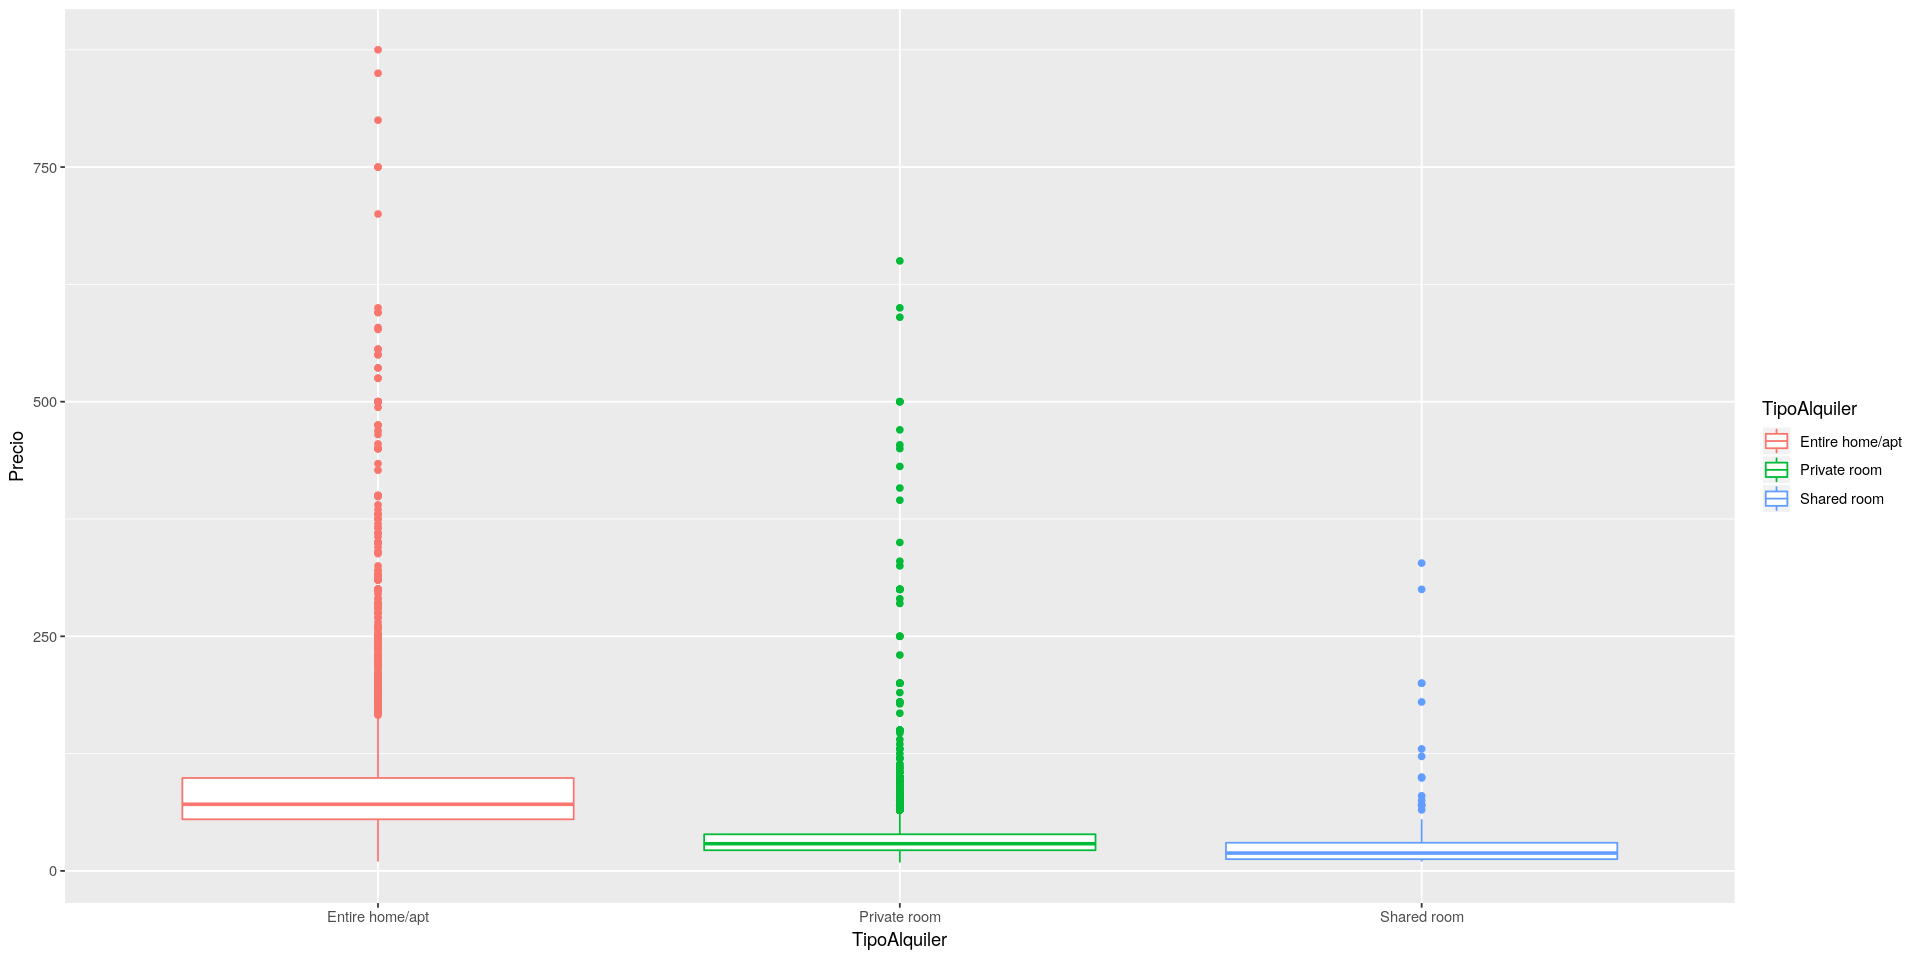

In [33]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+
    geom_boxplot()


Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [35]:
media1 = mean(airbnb$Precio[airbnb$TipoAlquiler == 'Entire home/apt'], na.rm = TRUE)
media2 = mean(airbnb$Precio[airbnb$TipoAlquiler == 'Private room'], na.rm = TRUE)
media3 = mean(airbnb$Precio[airbnb$TipoAlquiler == 'Shared room'], na.rm = TRUE)

print(paste("La media para Entire home/apt is: ", media1))
print(paste("La media para Private room is: ", media2))
print(paste("La media para Shared room is: ", media3))


[1] "La media para Entire home/apt is:  87.2966058763931"
[1] "La media para Private room is:  34.255135981217"
[1] "La media para Shared room is:  29.8534031413613"


In [36]:
print("Primero comprobamos que el precio tiene una distribucion normal en cada grupo, con el shapiro test:")

[1] "Primero comprobamos que el precio tiene una distribucion normal en cada grupo, con el shapiro test:"


In [37]:
print(paste("p-value for Price in Entire home/apt", shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=="Entire home/apt"], n=5000L))$p.value))
print(paste("p-value for Price in Private room", shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=="Private room"], n=5000L))$p.value))
print(paste("p-value for Price in Shared room", shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=="Shared room"], n=5000L))$p.value))

[1] "p-value for Price in Entire home/apt 1.24077898621874e-72"
[1] "p-value for Price in Private room 9.18974842339072e-85"
[1] "p-value for Price in Shared room 4.51672121600842e-24"


In [38]:
print("Podemos ver claramente que la distribucion que siguen NO es Gaussiana ya que los pvalues son muy pequeños.")

[1] "Podemos ver claramente que la distribucion que siguen NO es Gaussiana ya que los pvalues son muy pequeños."


In [40]:
print("Usaríamos entonces el test de Kruskal-Wallis, ya que estamos evaluando un ANOVA (comparamos la media para 3 grupos) pero no se cumple la normalidad de los datos")

[1] "Usaríamos entonces el test de Kruskal-Wallis, ya que estamos evaluando un ANOVA (comparamos la media para 3 grupos) pero no se cumple la normalidad de los datos"


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [41]:
airbnb_entire <- subset(airbnb, TipoAlquiler == 'Entire home/apt')

In [42]:
dim(airbnb_entire)

[1] 7903   14

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [43]:
subsetApartments <- subset(airbnb_entire, TipoPropiedad == 'Apartment')
head(summary(subsetApartments$Barrio), n=5L)

Embajadores Universidad     Palacio         Sol      Cortes 
       1099         897         684         648         528

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [66]:
#agregar avg precio por barrio
result <- aggregate(airbnb$Precio, list(airbnb$Barrio), FUN =mean)
result <-  result[order(-result$x),]

#result$x[result$Group.1 == 'Acacias']
colnames(result) <- c('Barrio','Precio')
head(result, n= 5L)


,Barrio,Precio
,<fct>,<dbl>
47,El Plantío,280.0000
82,Palomas,142.8333
54,Fuentelareina,127.6667
62,Jerónimos,103.7222
75,Nueva España,101.6000


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [67]:
f <- airbnb_entire$Barrio[airbnb_entire$TipoPropiedad == 'Apartment']
new_df2 = as.data.frame(table(f))

colnames(new_df2) <- c('Barrio', 'Freq')

dim(new_df2)

[1] 125   2

In [79]:
df <- merge(result, new_df2, by='Barrio', all=FALSE)
head(df)

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
1,Abrantes,28.16667,3
2,Acacias,45.71724,56
3,Adelfas,57.19608,27
4,Aeropuerto,32.16667,2
5,Aguilas,24.73333,2
6,Alameda de Osuna,49.54167,2


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [80]:
df <- df[order(-df$Precio),]
selection <- head(subset(df, Freq > 100), n =5L)
selection

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
112,Sol,85.58936,648
56,Goya,84.93013,122
114,Trafalgar,82.55238,203
41,Cortes,82.51467,528
63,Justicia,78.90446,486


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

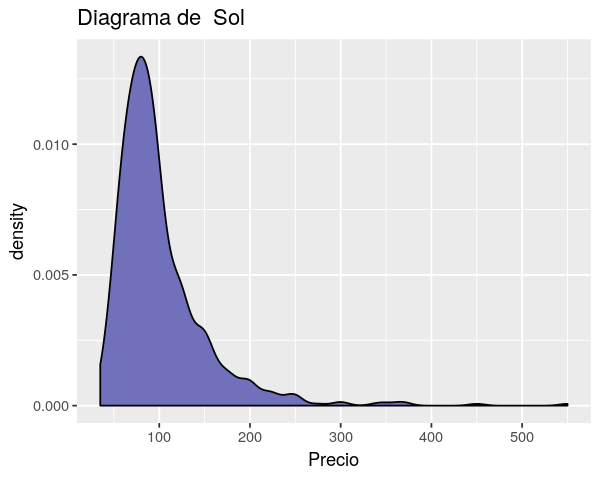

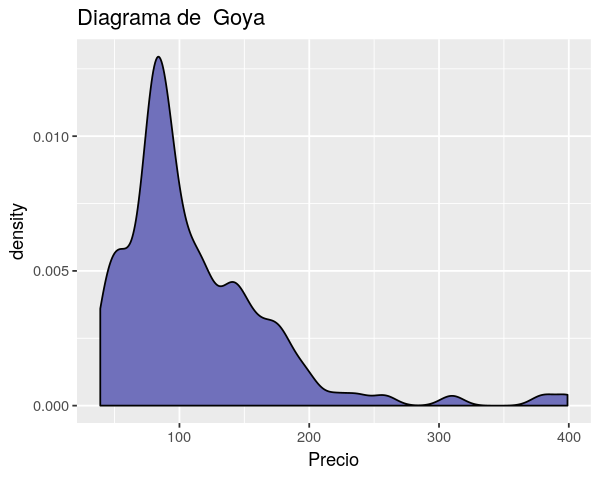

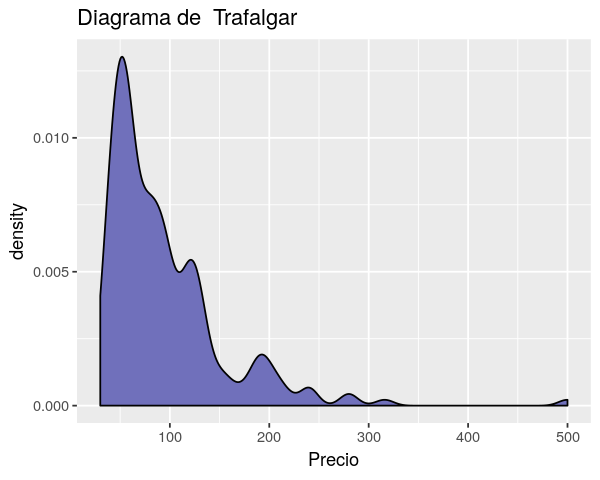

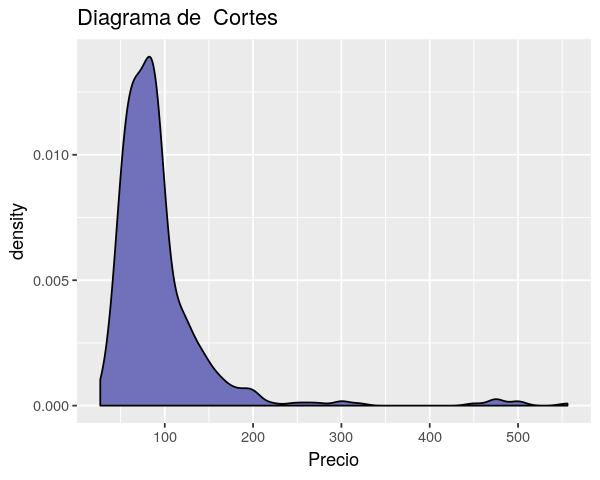

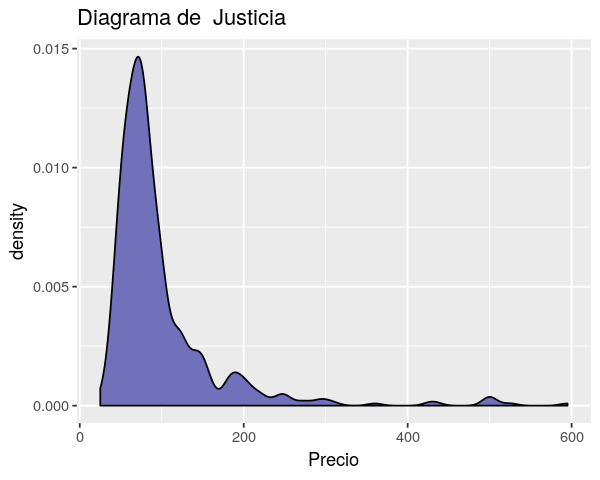

In [81]:
options(repr.plot.height=4,repr.plot.width=5)
for (i in 1:5){
    x <- selection[i,1]
    d <- subsetApartments[subsetApartments$Barrio == x,]
    g <- ggplot(data=d, aes(Precio))+ geom_density(fill="#7070BB",color="#010101", bw = 9)+
        ggtitle(paste("Diagrama de ",x))
    print(g)
}


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [82]:
r <- aggregate(airbnb$MetrosCuadrados, list(airbnb$Barrio), FUN =mean, na.rm = TRUE)
colnames(r) <- c('Barrio', 'TamañoMedio')

head(r)

df <- merge(df, r, by='Barrio')
head(df)

,Barrio,TamañoMedio
,<fct>,<dbl>
1,Abrantes,NaN
2,Acacias,25.66445
3,Adelfas,52.45923
4,Aeropuerto,NaN
5,Aguilas,60.01534
6,Alameda de Osuna,NaN


,Barrio,Precio,Freq,TamañoMedio
,<fct>,<dbl>,<int>,<dbl>
1,Abrantes,28.16667,3,NaN
2,Acacias,45.71724,56,25.66445
3,Adelfas,57.19608,27,52.45923
4,Aeropuerto,32.16667,2,NaN
5,Aguilas,24.73333,2,60.01534
6,Alameda de Osuna,49.54167,2,NaN


In [84]:
df <- df[order(-df$Precio),]
df <- head(subset(selection, Freq > 100), n =5L)
df

,Barrio,Precio,Freq,TamañoMedio
,<fct>,<dbl>,<int>,<dbl>
112,Sol,85.58936,648,41.40285
56,Goya,84.93013,122,50.40917
114,Trafalgar,82.55238,203,48.51395
41,Cortes,82.51467,528,15.35222
63,Justicia,78.90446,486,28.12251


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 593 rows containing non-finite values (stat_density).”
Warning message:
“Removed 119 rows containing non-finite values (stat_density).”


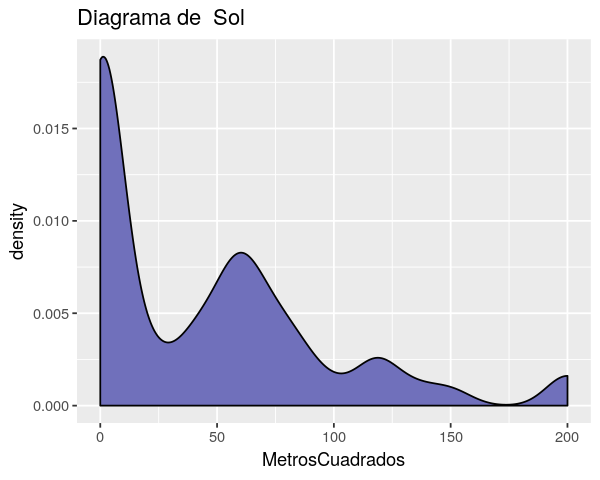

Warning message:
“Removed 196 rows containing non-finite values (stat_density).”


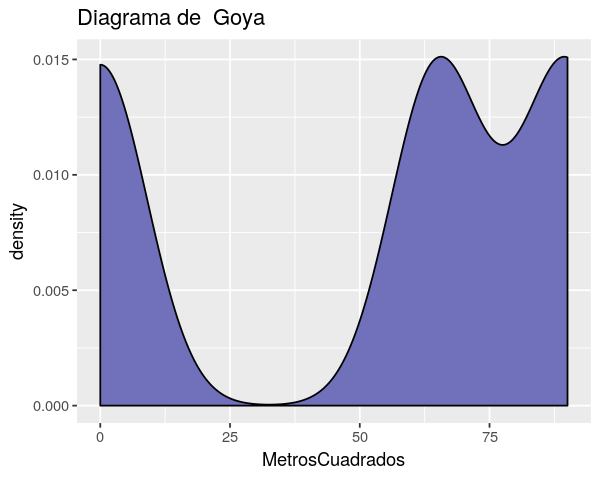

Warning message:
“Removed 500 rows containing non-finite values (stat_density).”


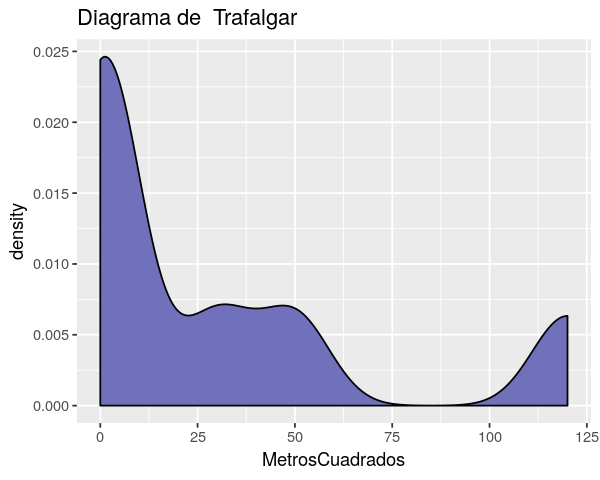

Warning message:
“Removed 470 rows containing non-finite values (stat_density).”


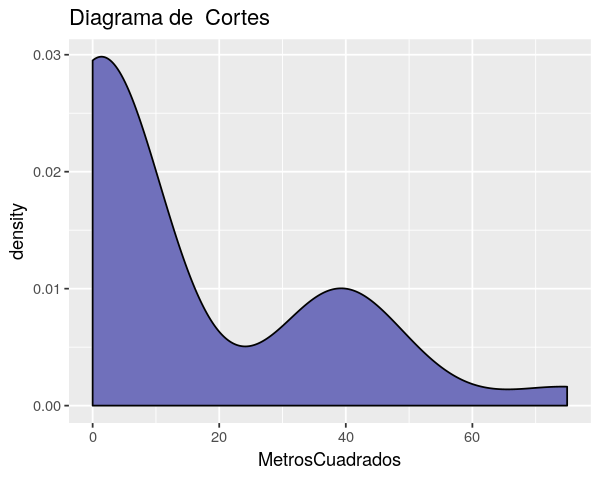

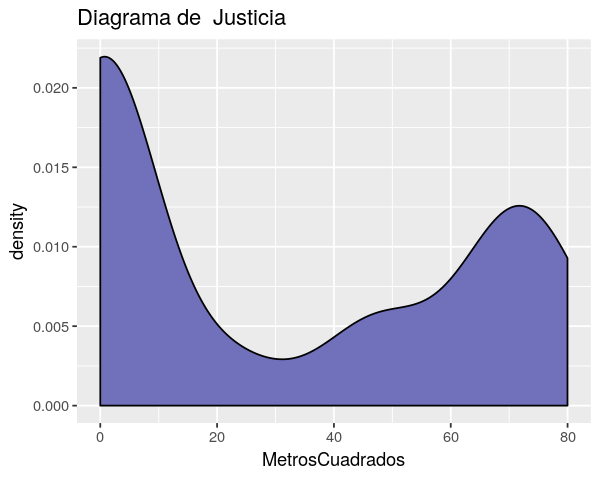

In [85]:
options(repr.plot.height=4,repr.plot.width=5)
for (i in 1:5){
    x <- selection[i,1] #pq lo hacemos por los 5 barrios con mayor precio y +100 de freq
    d <- subsetApartments[subsetApartments$Barrio == x,] #cojemos todos los metros cuadrados para ese barrio x
    g <- ggplot(data=d, aes(MetrosCuadrados))+ geom_density(fill="#7070BB",color="#010101", bw = 9)+
        ggtitle(paste("Diagrama de ",x))
    print(g)
}

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [86]:
print(paste("p-value for Price in Sol: ",shapiro.test(head(subsetApartments$MetrosCuadrados[subsetApartments$Barrio == 'Sol'], n=5000L))$p.value))
print(paste("p-value for Price in Goya: ",shapiro.test(head(subsetApartments$MetrosCuadrados[subsetApartments$Barrio == 'Goya'], n=5000L))$p.value))
print(paste("p-value for Price in Trafalgar: ",shapiro.test(head(subsetApartments$MetrosCuadrados[subsetApartments$Barrio == 'Trafalgar'], n=5000L))$p.value))
print(paste("p-value for Price in Cortes: ",shapiro.test(head(subsetApartments$MetrosCuadrados[subsetApartments$Barrio == 'Cortes'], n=5000L))$p.value))
print(paste("p-value for Price in Justicia: ",shapiro.test(head(subsetApartments$MetrosCuadrados[subsetApartments$Barrio == 'Justicia'], n=5000L))$p.value))


[1] "p-value for Price in Sol:  1.63326389094817e-06"
[1] "p-value for Price in Goya:  0.519924091564745"
[1] "p-value for Price in Trafalgar:  0.0127581397426826"
[1] "p-value for Price in Cortes:  3.49402473726885e-06"
[1] "p-value for Price in Justicia:  0.00139792480663199"


In [87]:
print("Parece que tampoco siguen una distribucion normal en los distintos barrios")
print("Por lo que hariamos tambien el Kruskal-Wallis test")

[1] "Parece que tampoco siguen una distribucion normal en los distintos barrios"
[1] "Por lo que hariamos tambien el Kruskal-Wallis test"


In [88]:
kruskal.test( TamañoMedio ~ Barrio, data=selection)


	Kruskal-Wallis rank sum test

data:  TamañoMedio by Barrio
Kruskal-Wallis chi-squared = 4, df = 4, p-value = 0.406


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [245]:
barrio_sol <- subset(airbnb_entire,Barrio=="Sol")
#head(barrio_sol, n=2L)
#dim(barrio_sol)

model <- lm(data=barrio_sol, formula=Precio~NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
NumBanyos       15.70888   10.15721   1.547 0.127701    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [248]:
subset <- data.frame("NumBanyos" = barrio_sol$NumBanyos,
                    "NumDormitorios" = barrio_sol$NumDormitorios,
                    "MaxOcupantes" = barrio_sol$MaxOcupantes,
                    "MetrosCuadrados" = barrio_sol$MetrosCuadrados)

cor(subset, use="pairwise.complete.obs")


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


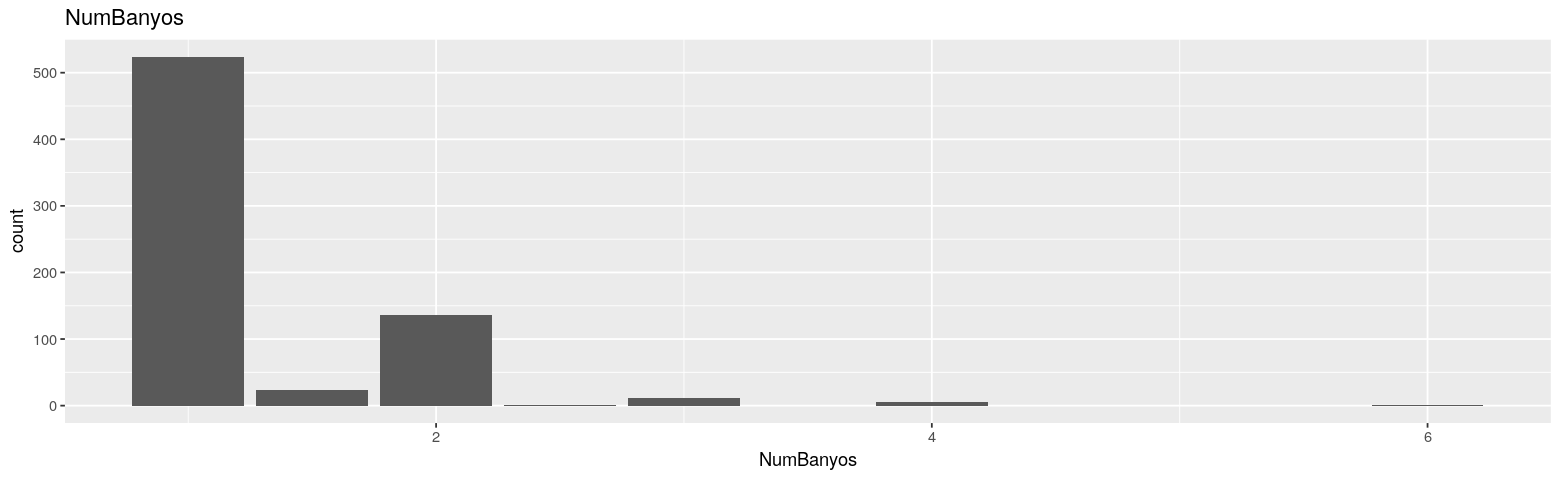

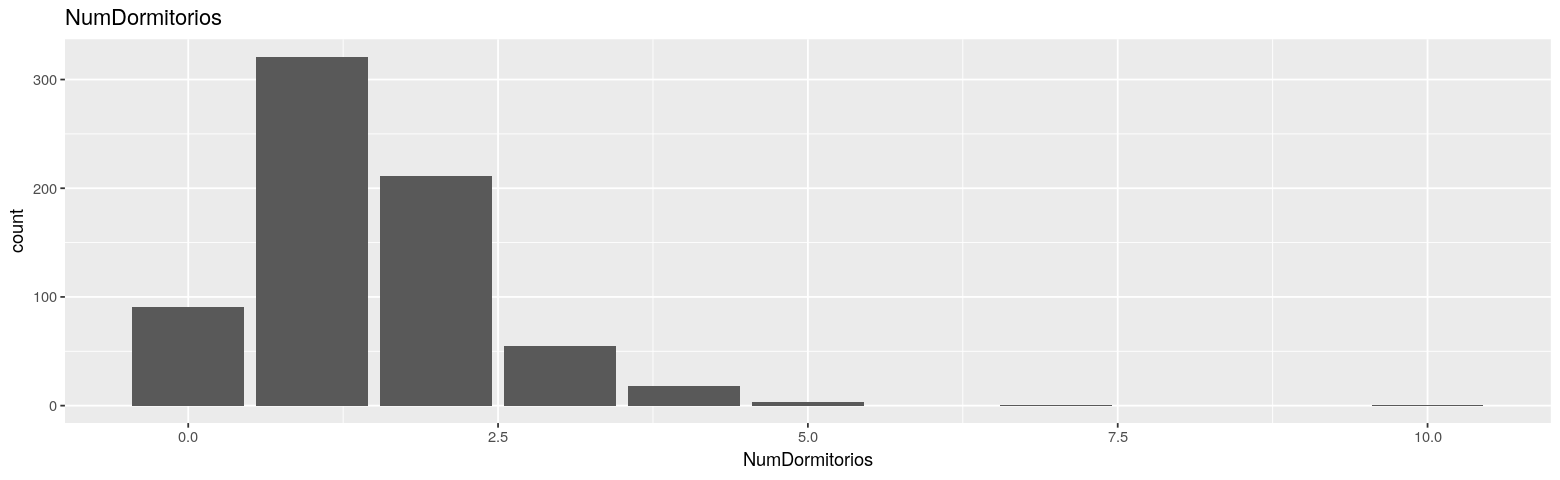

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


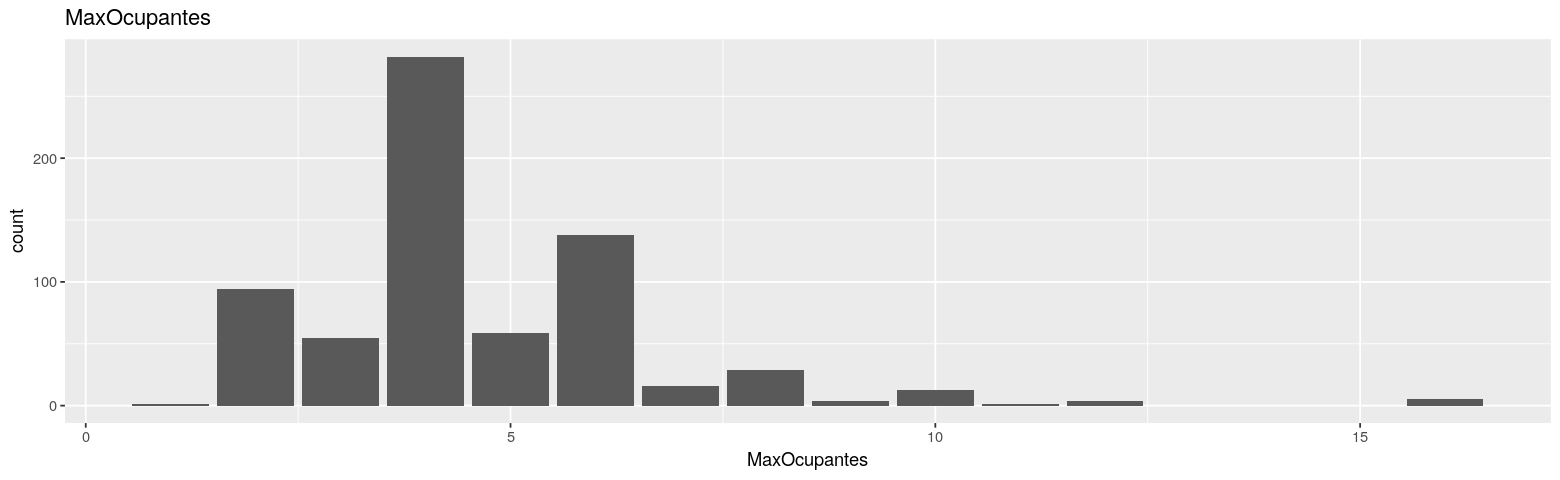

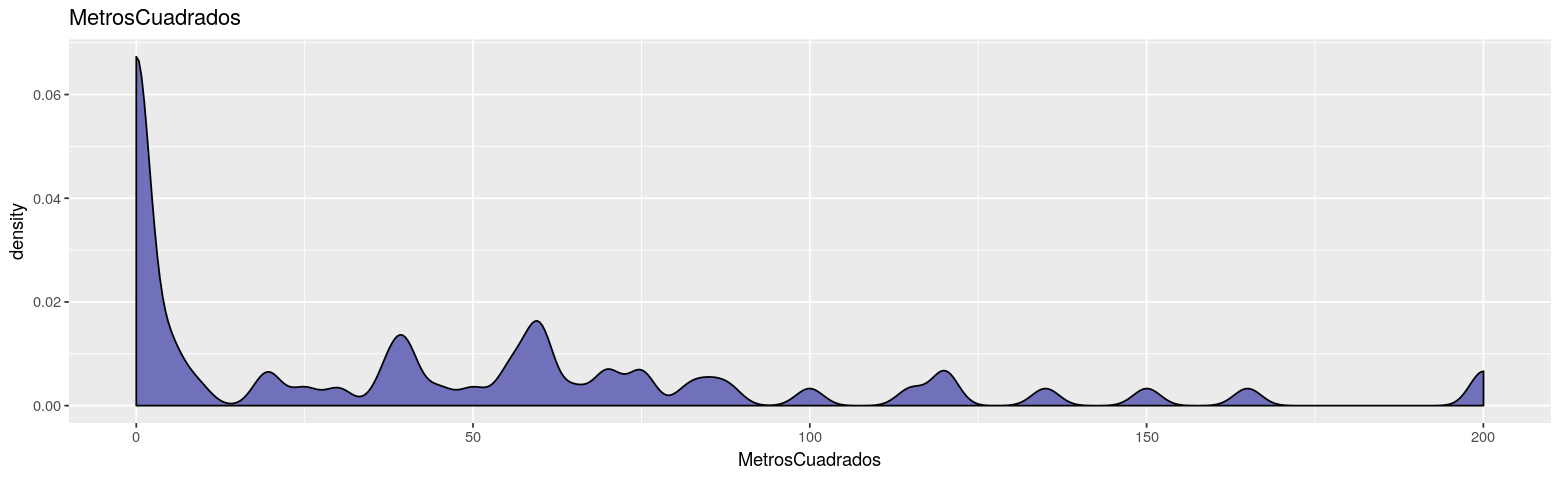

In [249]:
ggplot(data=barrio_sol, aes(NumBanyos)) +         
    geom_bar() +
    ggtitle("NumBanyos ")

ggplot(data=barrio_sol, aes(NumDormitorios)) +         
    geom_bar() +
    ggtitle("NumDormitorios ")

ggplot(data=barrio_sol, aes(MaxOcupantes)) +         
    geom_bar() +
    ggtitle("MaxOcupantes ")

ggplot(data=barrio_sol, aes(MetrosCuadrados)) +         
    geom_density(fill="#7070BB",color="#010101", bw = 2) +
    ggtitle("MetrosCuadrados ")

In [250]:
print("Para NumBanyos quitamos los que tengan valor 0, ya que no tiene sentido. Lo mismo para NumDormitorios. ")
print("Ya que si estamos mirando en el subset de 'Entire home/apt' no tiene sentido que no hayan baños o dormitorios")
print("Para MetrosCuadrados quitamos los que tengan menos de 15 m2 ya que no da para una casa o apartamento entero")

[1] "Para NumBanyos quitamos los que tengan valor 0, ya que no tiene sentido. Lo mismo para NumDormitorios. "
[1] "Ya que si estamos mirando en el subset de 'Entire home/apt' no tiene sentido que no hayan baños o dormitorios"
[1] "Para MetrosCuadrados quitamos los que tengan menos de 15 m2 ya que no da para una casa o apartamento entero"


In [251]:
barrio_sol <- subset(barrio_sol, NumBanyos != 0)
barrio_sol <- subset(barrio_sol, NumDormitorios != 0)
barrio_sol <- subset(barrio_sol, MetrosCuadrados > 15)

In [252]:
subset <- data.frame("NumBanyos" = barrio_sol$NumBanyos,
                    "NumDormitorios" = barrio_sol$NumDormitorios,
                    "MaxOcupantes" = barrio_sol$MaxOcupantes,
                    "MetrosCuadrados" = barrio_sol$MetrosCuadrados)

cor(subset, use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7337699,0.8579905,0.5928876
NumDormitorios,0.7337699,1.0000000,0.7827712,0.8163771
MaxOcupantes,0.8579905,0.7827712,1.0000000,0.6957651
MetrosCuadrados,0.5928876,0.8163771,0.6957651,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [253]:
model2 <- lm(data=barrio_sol, formula=Precio~NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model2)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.042 -13.252  -2.146  19.666  60.825 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      24.0964    13.8767   1.736  0.09432 . 
NumBanyos        -2.3020    15.6011  -0.148  0.88383   
NumDormitorios   32.5218    10.1108   3.217  0.00346 **
MaxOcupantes      2.7079     4.7448   0.571  0.57311   
MetrosCuadrados   0.1999     0.2200   0.909  0.37189   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.59 on 26 degrees of freedom
Multiple R-squared:  0.7534,	Adjusted R-squared:  0.7155 
F-statistic: 19.86 on 4 and 26 DF,  p-value: 1.346e-07


In [254]:
library(MASS)
m <- stepAIC(model2,trace=FALSE)

In [255]:
confint(m)

,2.5 %,97.5 %
(Intercept),11.41223,54.36366
NumDormitorios,33.01073,52.28146


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [256]:
print("Para comparar el efecto de estas dos variables, hacemos model3 que combine estas dos")

[1] "Para comparar el efecto de estas dos variables, hacemos model3 que combine estas dos"


In [257]:
model3 <- lm(data=barrio_sol, formula=Precio~NumDormitorios+MetrosCuadrados)

In [258]:
summary(model3)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.298 -13.081  -1.841  19.108  61.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      27.8002    11.4561   2.427 0.021927 *  
NumDormitorios   35.3982     8.1306   4.354 0.000162 ***
MetrosCuadrados   0.2273     0.2082   1.092 0.284167    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.67 on 28 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.7314 
F-statistic: 41.84 on 2 and 28 DF,  p-value: 3.879e-09


In [259]:
print("La variable que más parece influir en el precio es el NumDormitorios")
print("Podemos ver que su pvalue es mucho más pequeño")

[1] "La variable que más parece influir en el precio es el NumDormitorios"
[1] "Podemos ver que su pvalue es mucho más pequeño"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [260]:
model3


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Coefficients:
    (Intercept)   NumDormitorios  MetrosCuadrados  
        27.8002          35.3982           0.2273  


In [261]:
print("Aquí vemos que  el coefficient beta2 es 0.2273")
print("Esto significa que por cada MetroCuadrado más, el precio se incrementa 0.2273 euros")

[1] "Aquí vemos que  el coefficient beta2 es 0.2273"
[1] "Esto significa que por cada MetroCuadrado más, el precio se incrementa 0.2273 euros"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [262]:
print("Aquí vemos que  el coefficient beta1 es 35.3982")
print("Esto significa que por cada dormitorio más, el precio se incrementa 35.3982 euros")

[1] "Aquí vemos que  el coefficient beta1 es 35.3982"
[1] "Esto significa que por cada dormitorio más, el precio se incrementa 35.3982 euros"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

[1] "This could follow a Poisson distribution as we are in a discrete distribution"


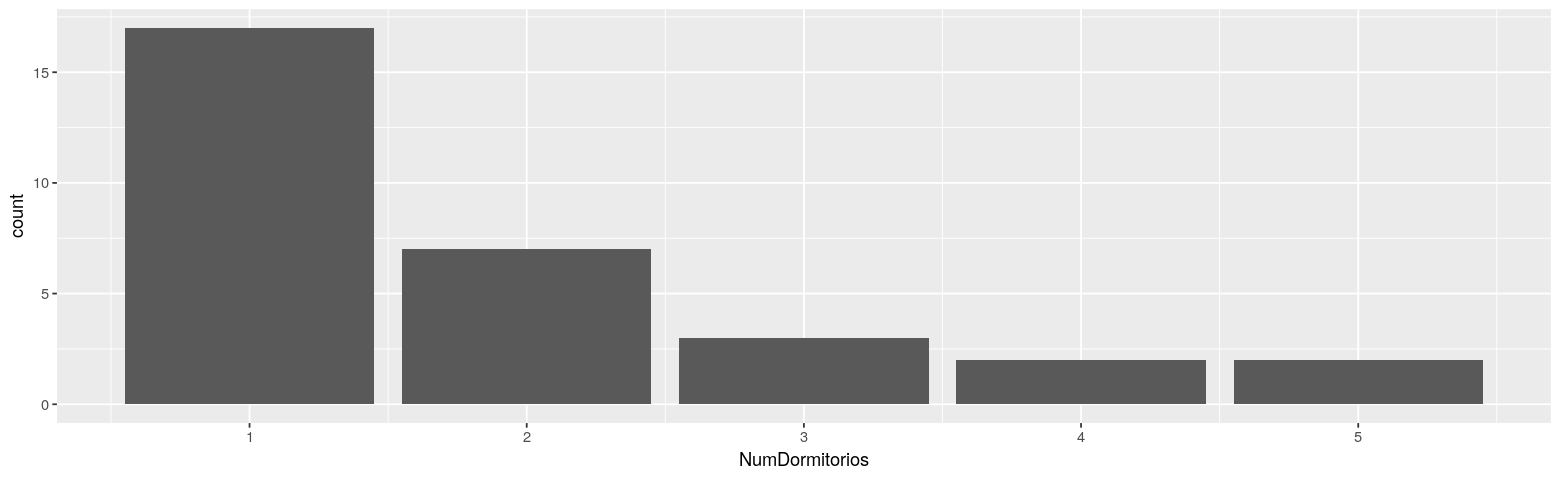

In [292]:
ggplot(data=barrio_sol, aes(NumDormitorios)) +         
    geom_bar() 

print("This could follow a Poisson distribution as we are in a discrete distribution")

In [298]:
print(paste("With lambda: ",mean(barrio_sol$NumDormitorios)))

[1] "With lambda:  1.87096774193548"


In [299]:
k=3
l=mean(barrio_sol$NumDormitorios)

print(paste("La probabilidad de encontrar un apartamento en Sol con exactamente",
            k,"dormitorios, es:",dpois(k,l)))

[1] "La probabilidad de encontrar un apartamento en Sol con exactamente 3 dormitorios, es: 0.168072508751536"
